In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import seaborn as sns
sns.set()
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler

# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv('../input/Dataset_spine.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


### There's one column which is unnamed and has only 14 non null values. That seems rather odd. Let's check what this column is all about 

In [4]:
data['Unnamed: 13'][:20]

0                                                   NaN
1                                                   NaN
2     Prediction is done by using binary classificat...
3                                                   NaN
4                                                   NaN
5            Attribute1  = pelvic_incidence  (numeric) 
6                   Attribute2 = pelvic_tilt (numeric) 
7         Attribute3 = lumbar_lordosis_angle (numeric) 
8                  Attribute4 = sacral_slope (numeric) 
9                 Attribute5 = pelvic_radius (numeric) 
10     Attribute6 = degree_spondylolisthesis (numeric) 
11                    Attribute7= pelvic_slope(numeric)
12                     Attribute8= Direct_tilt(numeric)
13                  Attribute9= thoracic_slope(numeric)
14                  Attribute10= cervical_tilt(numeric)
15                    Attribute11=sacrum_angle(numeric)
16                Attribute12= scoliosis_slope(numeric)
17                                              

#### Nice thing this column is all about metadata. We'll use the data and drop this column.

In [5]:
data.drop(['Unnamed: 13'],axis=1,inplace=True)

### The columns are named in an unintuitive manner. So the unnamed column is all about the column details. We'll use this column data well.


In [6]:
data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','State']

In [7]:
## Let's check how the data looks now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
State                       310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [8]:
data.describe(include="all")

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,State
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,NaN


#### Okay! So the data column ranges vary largely. That calls for standardisation at a later stage!

In [9]:
data.State.value_counts()

Abnormal    210
Normal      100
Name: State, dtype: int64

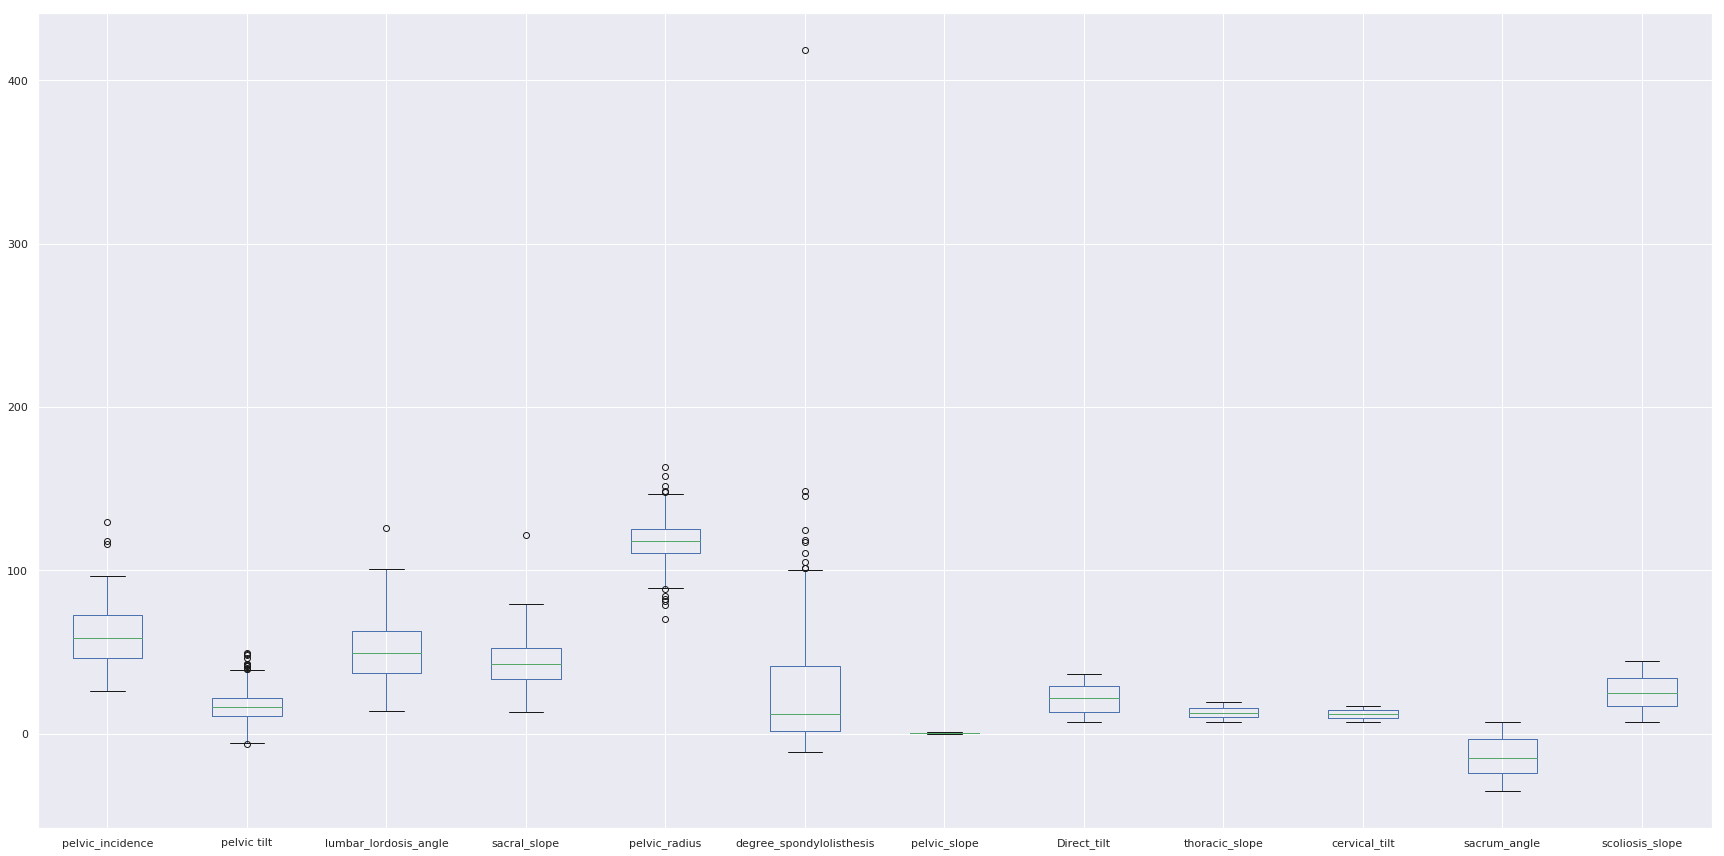

In [10]:
p = data.plot(kind='box',figsize =(30,15))

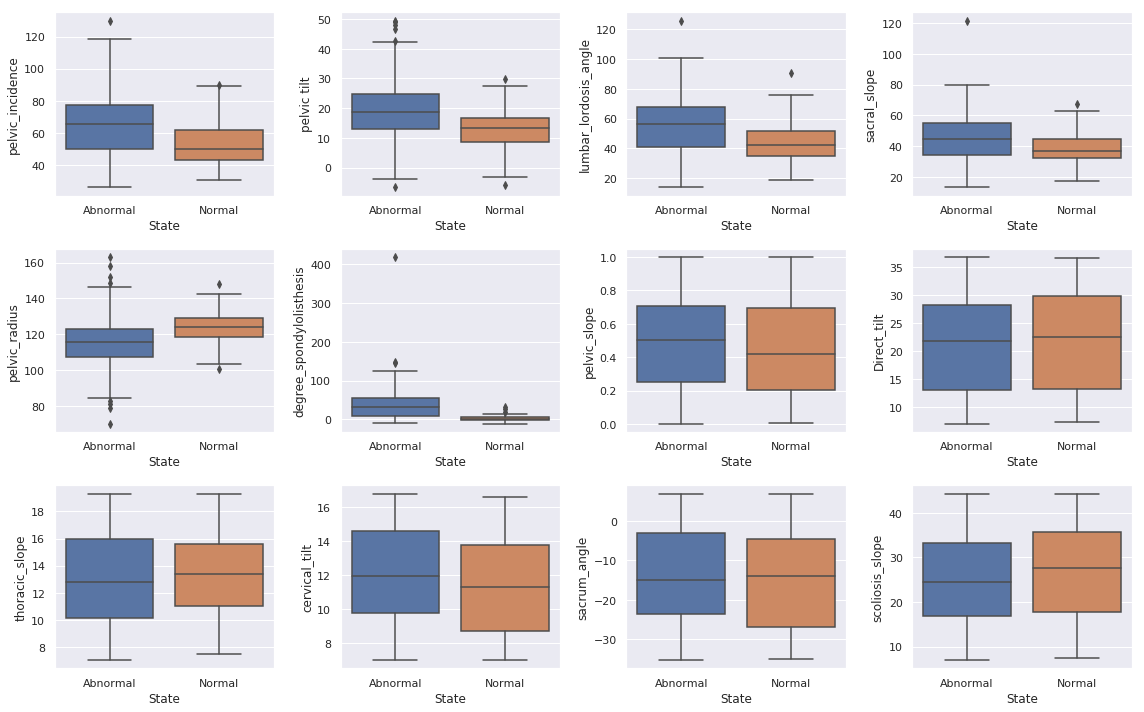

In [11]:
fig,ax = plt.subplots(nrows = 3, ncols=4, figsize=(16,10))
row = 0
col = 0
for i in range(len(data.columns) -1):
    if col > 3:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data['State'], y = data[data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

#### Seems like the data has outliers which need to be removed but these could also be real exceptional cases in data. Not every outlier is bad. Let's see how we can best handle them later

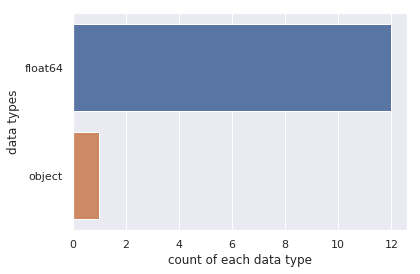

In [12]:
sns.countplot(y=data.dtypes ,data=data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

## We change data type of State from object to integer by label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data['State_Code'] = lb_make.fit_transform(data['State'])

In [14]:
data.State_Code.value_counts()

0    210
1    100
Name: State_Code, dtype: int64

### storing the preprocessed data for future reference

In [15]:
data.to_csv('Dataset_spine_clean.csv')

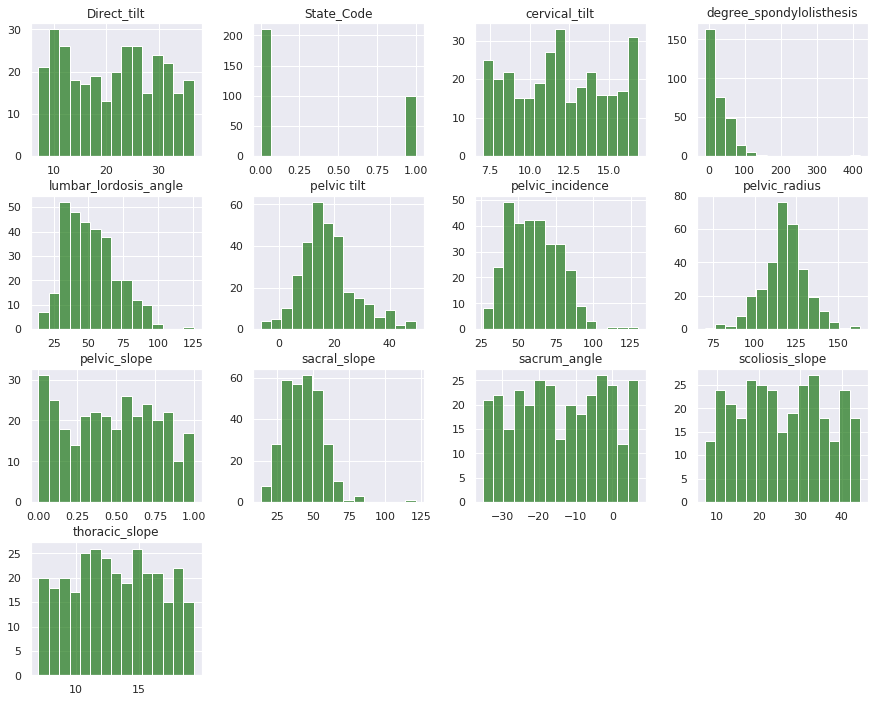

In [16]:
data.hist(figsize=(15,12),bins = 15, color="#107009AA")
plt.title("Features Distribution")
plt.show()

#### Most of the columns don't seem to be normally distributed

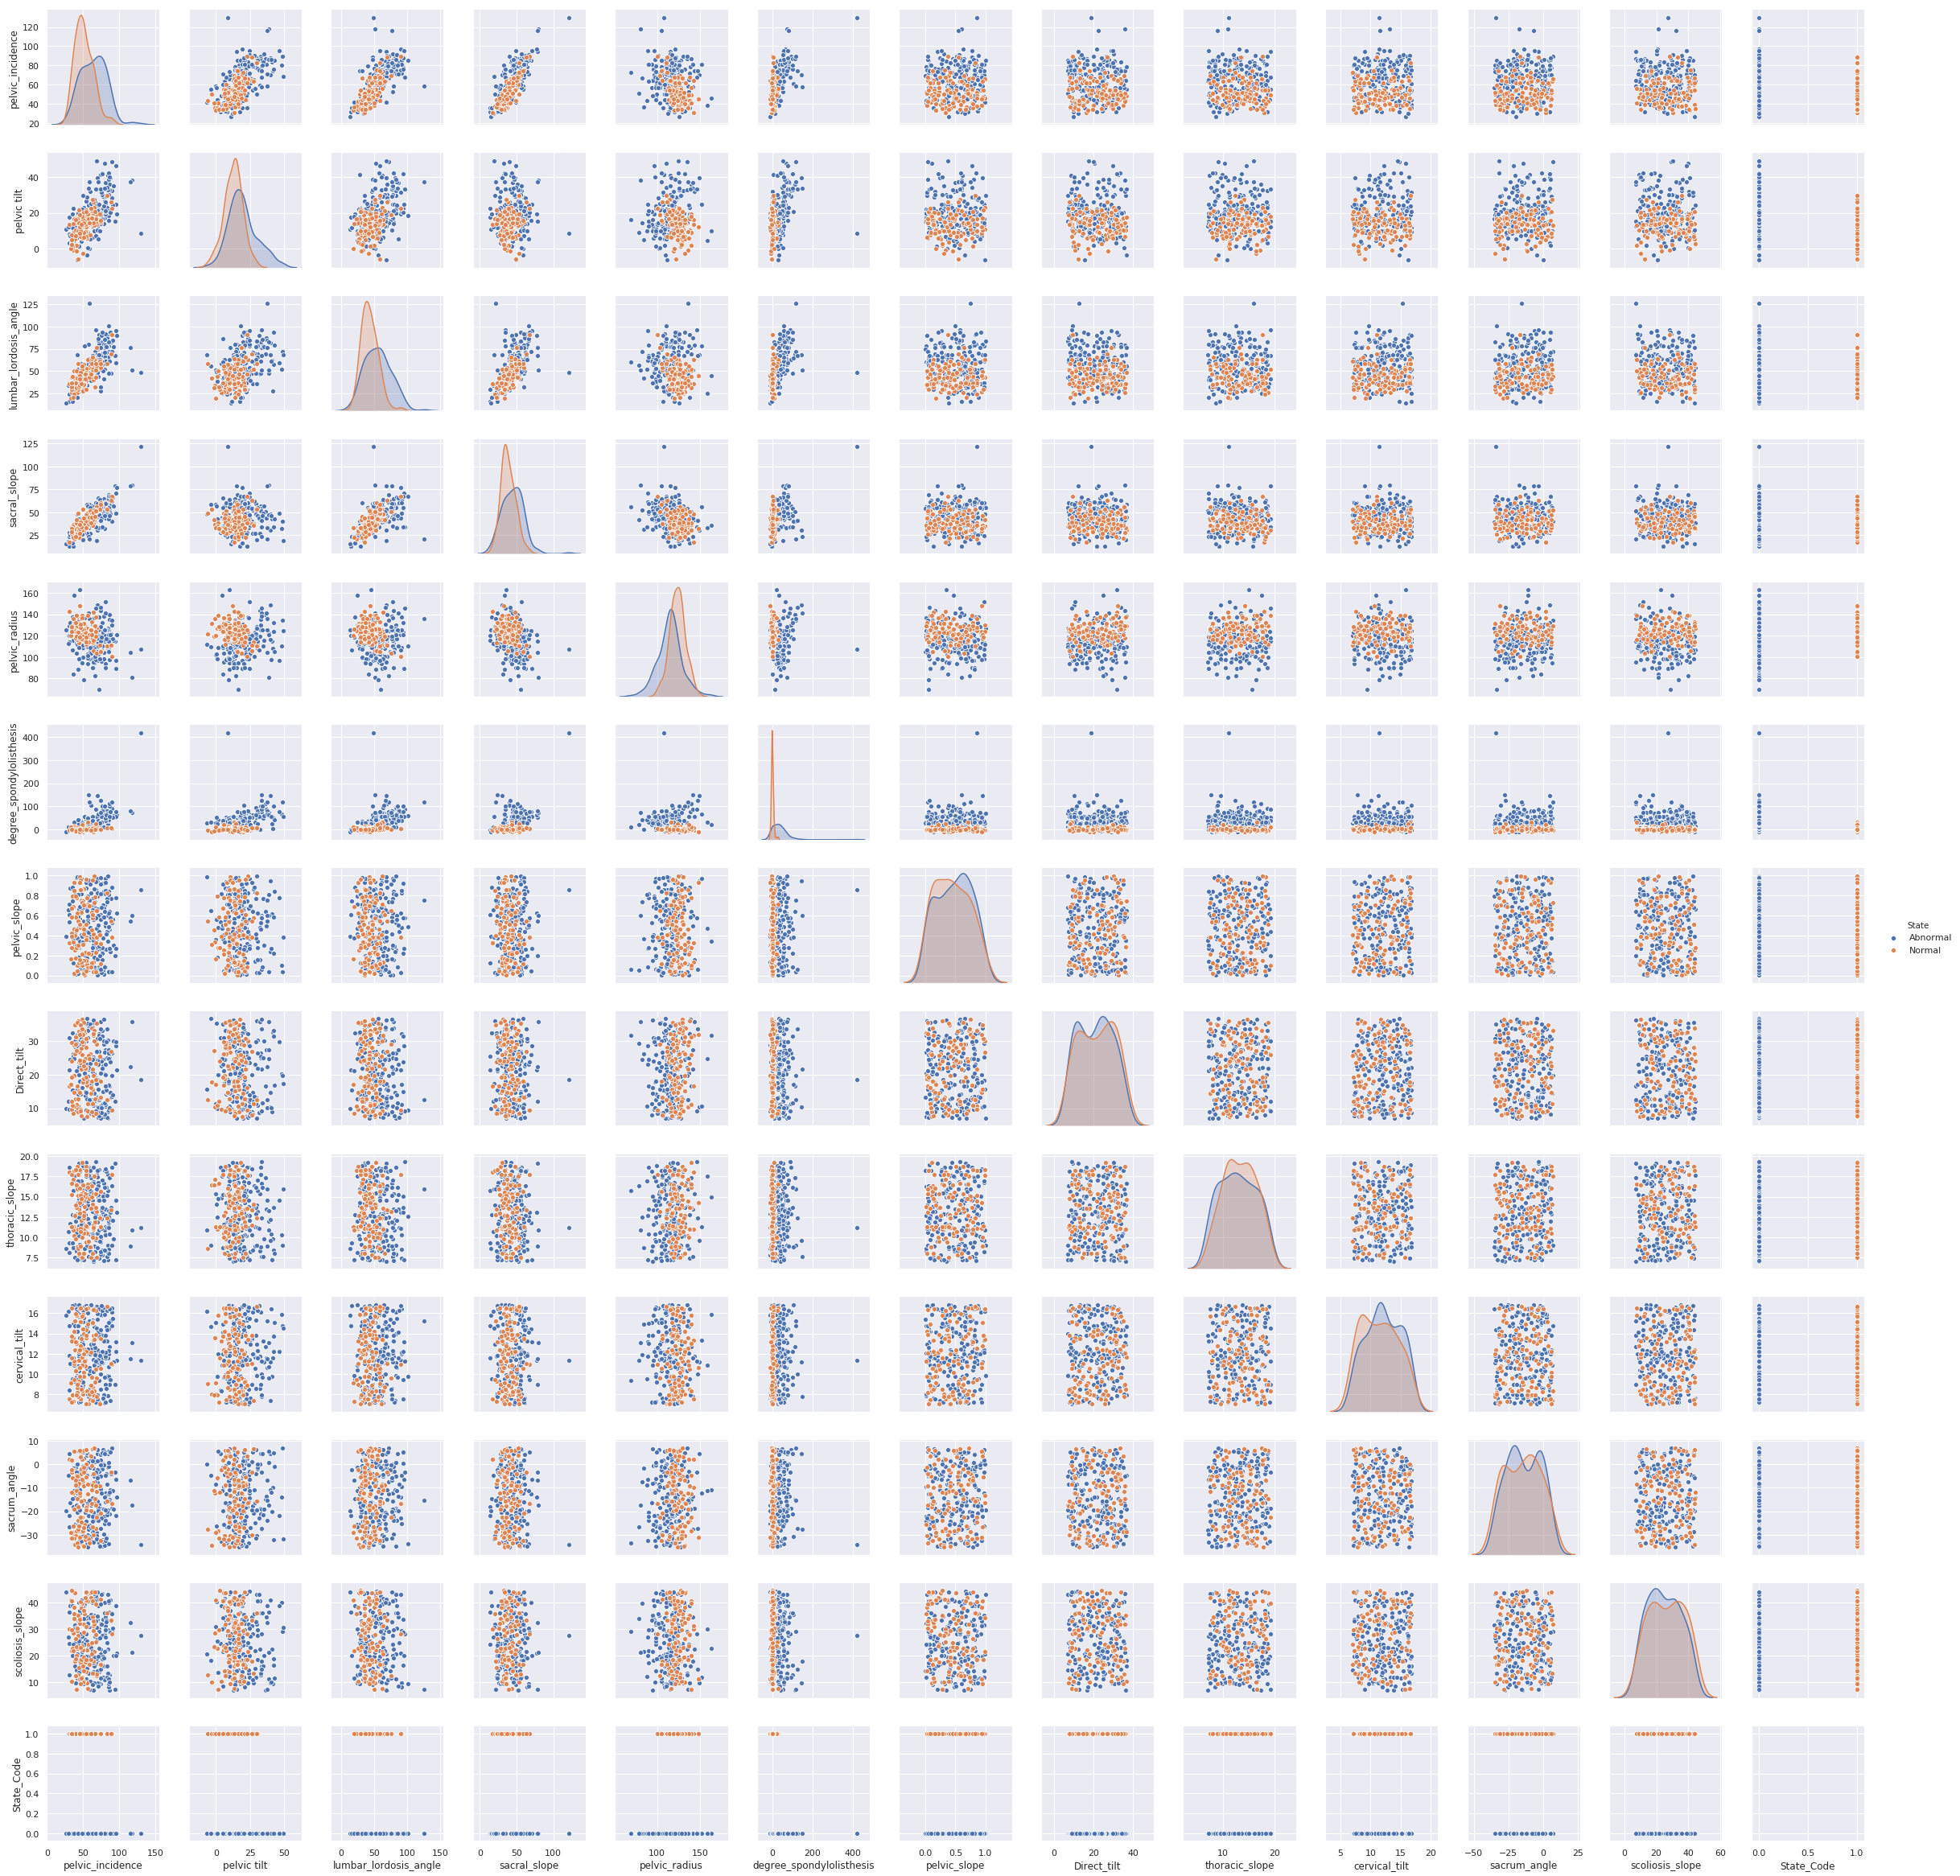

In [17]:
p=sns.pairplot(data, hue = 'State')

In [18]:
data.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'State', 'State_Code'],
      dtype='object')

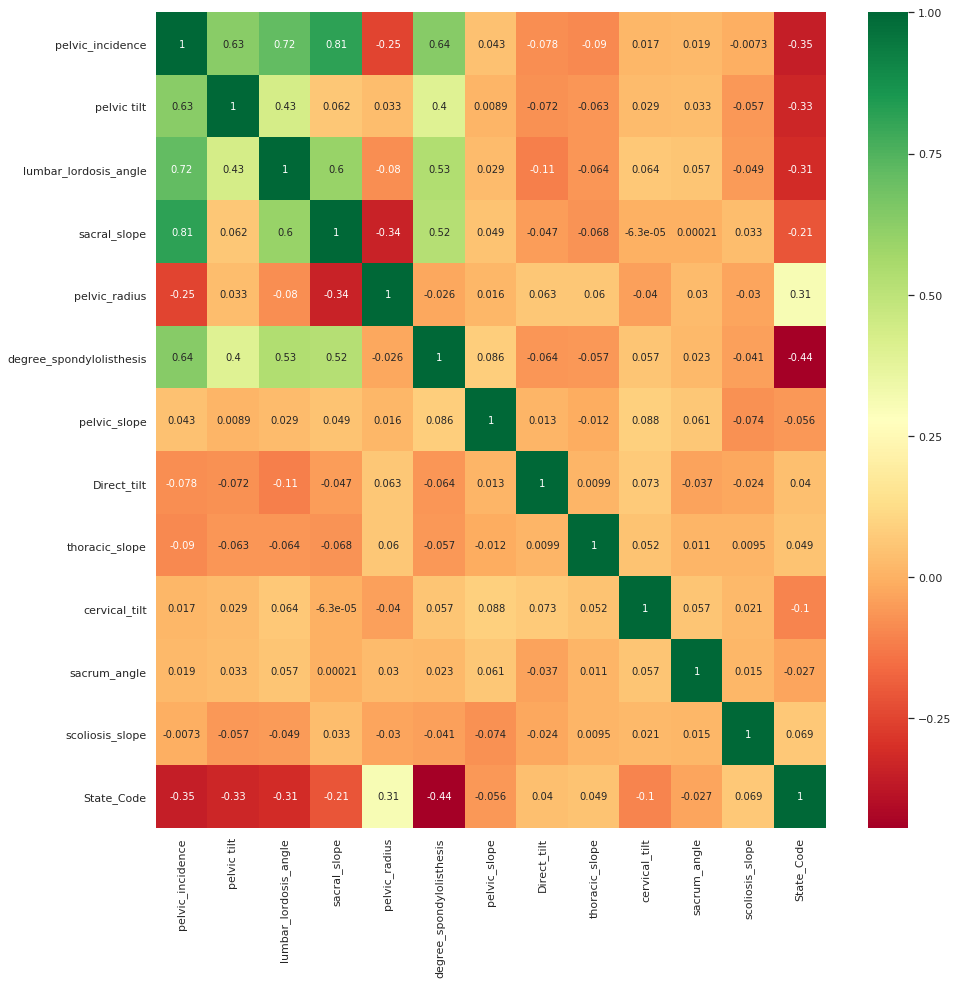

In [19]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn') 

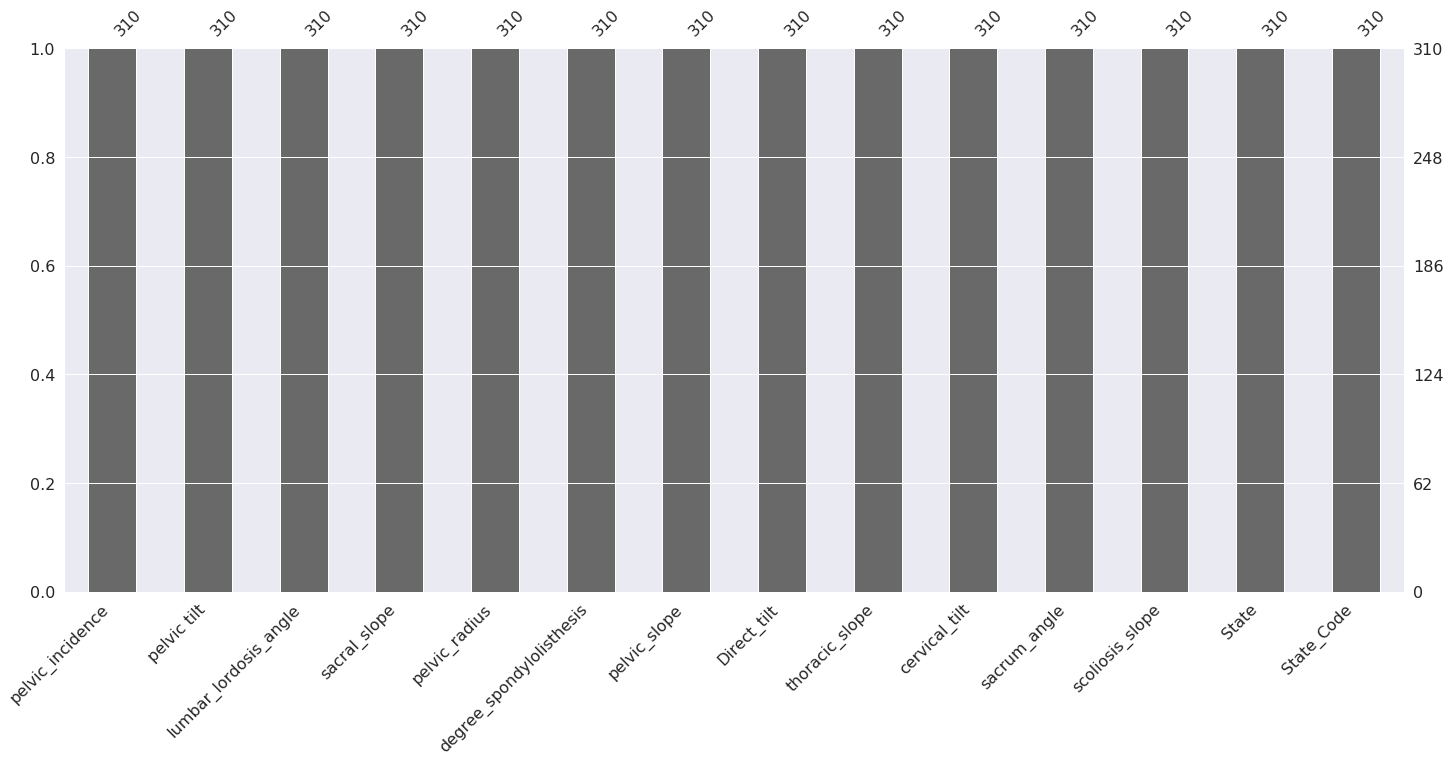

In [20]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(data)

### No null values to deal with. Good!

In [21]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["State",'State_Code'],axis = 1)), columns = ['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope'])
#X = data.drop(["State",'State_Code'],axis = 1)
y = data.State_Code

In [22]:
X.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858


### Applying Stratification on the basis of y to keep the ratio of both categories in the y column maintained in training and testing parts. 
### kept the test size small to conpensate for the too small dataset

In [23]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42, stratify=y)


In [24]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [25]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [26]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 87.09677419354838 % and k = [12, 13]


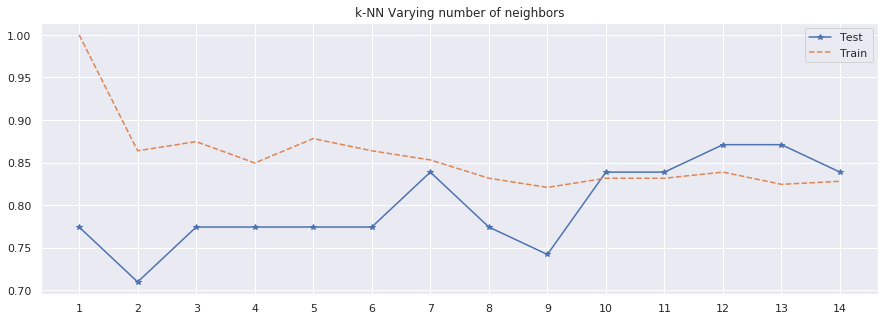

In [27]:
import matplotlib
plt.figure(figsize=(15,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15),test_scores,label="Test", marker='*')
plt.plot(range(1,15),train_scores,label="Train",linestyle='--')
plt.legend()
plt.xticks(range(1,15))
plt.show()

## Performing KNN at k = 13 (best test score parameter and prime number)

In [28]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8709677419354839

In [29]:
y_pred = knn.predict(X_test)

Text(0.5,12.5,'Predicted label')

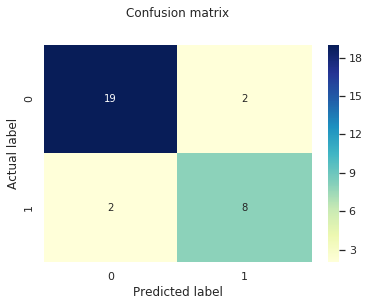

In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.80      0.80      0.80        10

   micro avg       0.87      0.87      0.87        31
   macro avg       0.85      0.85      0.85        31
weighted avg       0.87      0.87      0.87        31



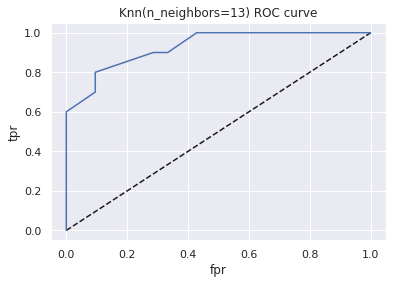

In [32]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=13) ROC curve')
plt.show()